'vorticity_evolution.gif'

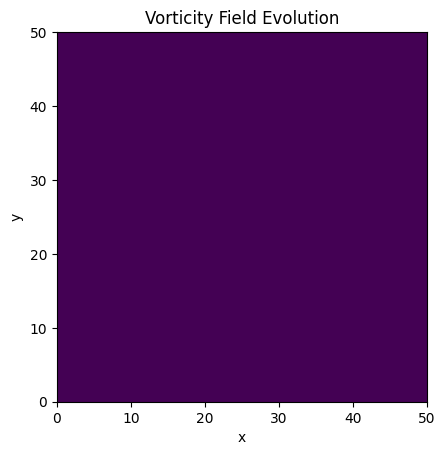

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Re-define parameters and initial conditions
nx, ny = 50, 50  # Grid points
dx, dy = 1.0, 1.0  # Grid spacings
dt = 0.01  # Time step
nu = 0.1  # Viscosity
steps = 100  # Number of time steps
alpha = 0.5  # Relaxation parameter for fixed-point iteration

# Initialize vorticity field and velocity field
omega = np.zeros((nx, ny))
u = np.ones((nx, ny))  # Assumed constant for simplicity
v = np.zeros((nx, ny))

# Initialize a field to store the next time step vorticity
omega_next = np.copy(omega)

# Implement the fixed-point iteration for the Crank-Nicolson method
def fixed_point_iteration(omega, u, v, dt, dx, dy, nu, alpha):
    omega_star = np.copy(omega)
    for _ in range(10):  # Perform 10 fixed-point iterations
        omega_next = np.copy(omega_star)
        for i in range(1, nx-1):
            for j in range(1, ny-1):
                # Central differences for diffusion term
                diffusion = nu * (
                    (omega_star[i+1, j] - 2*omega_star[i, j] + omega_star[i-1, j]) / dx**2 +
                    (omega_star[i, j+1] - 2*omega_star[i, j] + omega_star[i, j-1]) / dy**2
                )

                # Central differences for advection term
                advection = (
                    u[i, j] * (omega_star[i+1, j] - omega_star[i-1, j]) / (2*dx) +
                    v[i, j] * (omega_star[i, j+1] - omega_star[i, j-1]) / (2*dy)
                )

                # Crank-Nicolson with fixed-point iteration
                omega_next[i, j] = alpha * omega_star[i, j] + (1 - alpha) * (
                    omega[i, j] + dt/2 * (diffusion - advection + diffusion - advection)
                )

        # Check for convergence (this is a simple check, in practice a tolerance should be used)
        if np.allclose(omega_star, omega_next, atol=1e-6):
            break
        omega_star = omega_next
    
    return omega_next

# Initialize plot for the animation
fig, ax = plt.subplots()

# Initialize the vorticity field plot
vorticity_plot = ax.imshow(omega, cmap='viridis', interpolation='none', extent=[0, nx*dx, 0, ny*dy])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Vorticity Field Evolution')

# Function to update the plot for each frame
def update(frame):
    global omega
    omega = fixed_point_iteration(omega, u, v, dt, dx, dy, nu, alpha)
    vorticity_plot.set_data(omega)
    return vorticity_plot,

# Create the animation
anim = FuncAnimation(fig, update, frames=steps, interval=50, blit=True)

# Save the animation as a GIF file
gif_path = 'vorticity_evolution.gif'
anim.save(gif_path, fps=20)

# Return the path of the saved GIF
gif_path


In [4]:
import numpy as np

# Parameters
nx, ny = 50, 50  # Grid points
dx, dy = 1.0, 1.0  # Grid spacings
dt = 0.01  # Time step
nu = 0.1  # Viscosity
steps = 100  # Number of time steps

# Initial condition for vorticity (omega)
omega = np.zeros((nx, ny))

# Velocity field (u, v) - assuming some constant field for demonstration
u = np.ones((nx, ny))
v = np.zeros((nx, ny))

# Function to update omega using the Crank-Nicolson method
def update_omega(omega, u, v, dt, dx, dy, nu):
    omega_new = np.copy(omega)
    for i in range(1, nx-1):
        for j in range(1, ny-1):
            # Advection terms (central differences)
            advect = 0.5 * (
                u[i, j] * (omega[i+1, j] - omega[i-1, j]) / (2 * dx) +
                v[i, j] * (omega[i, j+1] - omega[i, j-1]) / (2 * dy)
            )

            # Diffusion terms (central differences)
            diff = nu * (
                (omega[i+1, j] - 2*omega[i, j] + omega[i-1, j]) / dx**2 +
                (omega[i, j+1] - 2*omega[i, j] + omega[i, j-1]) / dy**2
            )

            # Crank-Nicolson step
            omega_new[i, j] = omega[i, j] + dt * (advect + diff)

    return omega_new

# Time-stepping
for step in range(steps):
    omega = update_omega(omega, u, v, dt, dx, dy, nu)

# Return the final state of omega
omega[-1,:]  # Just showing the last row for brevity


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


KeyboardInterrupt: 

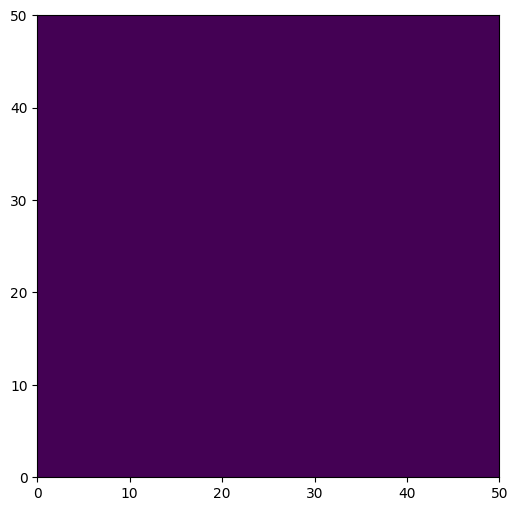

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Parameters
nx, ny = 50, 50  # Grid points
dx, dy = 1.0, 1.0  # Grid spacings
dt = 0.01  # Time step
nu = 0.1  # Viscosity
steps = 100  # Number of time steps for the animation
alpha = 0.5  # Relaxation parameter for fixed-point iteration

# Initial condition for vorticity (omega)
omega = np.zeros((nx, ny)) + 200

# Velocity field (u, v) - assuming some constant field for demonstration
u = np.ones((nx, ny))
v = np.zeros((nx, ny))

# Crank-Nicolson with fixed-point iteration for the implicit part
def fixed_point_iteration(omega, u, v, dt, dx, dy, nu, alpha):
    omega_new = np.copy(omega)
    omega_next = np.copy(omega)

    # Fixed-point iteration
    for _ in range(1000):  # Limiting to 10 iterations for demonstration
        for i in range(1, nx-1):
            for j in range(1, ny-1):
                advect_n = 0.5 * (
                    u[i, j] * (omega[i+1, j] - omega[i-1, j]) / (2 * dx) +
                    v[i, j] * (omega[i, j+1] - omega[i, j-1]) / (2 * dy)
                )
                advect_np1 = 0.5 * (
                    u[i, j] * (omega_next[i+1, j] - omega_next[i-1, j]) / (2 * dx) +
                    v[i, j] * (omega_next[i, j+1] - omega_next[i, j-1]) / (2 * dy)
                )

                diff_n = nu * (
                    (omega[i+1, j] - 2*omega[i, j] + omega[i-1, j]) / dx**2 +
                    (omega[i, j+1] - 2*omega[i, j] + omega[i, j-1]) / dy**2
                )
                diff_np1 = nu * (
                    (omega_next[i+1, j] - 2*omega_next[i, j] + omega_next[i-1, j]) / dx**2 +
                    (omega_next[i, j+1] - 2*omega_next[i, j] + omega_next[i, j-1]) / dy**2
                )

                # Update formula using the fixed-point iteration method
                omega_new[i, j] = alpha * omega_next[i, j] + (1 - alpha) * (
                    omega[i, j] + dt / 2 * (advect_n + advect_np1 + diff_n + diff_np1)
                )

        omega_next = omega_new
        print(np.allclose(omega_new, omega_next, atol=1e-6))
    return omega_new

# Set up the figure and axis for the animation
fig, ax = plt.subplots(figsize=(6, 6))
cax = ax.imshow(omega, extent=[0, nx*dx, 0, ny*dy], origin='lower')

def animate(step):
    global omega
    omega = fixed_point_iteration(omega, u, v, dt, dx, dy, nu, alpha)
    cax.set_data(omega)
    ax.set_title(f"Step {step+1}")
    return cax,

# Create animation
anim = FuncAnimation(fig, animate, frames=steps, interval=50, blit=True)

# Save the animation as a gif file
gif_path = "vorticity_evolution.gif"
anim.save(gif_path, fps=20)

# Return the path of the saved gif
gif_path


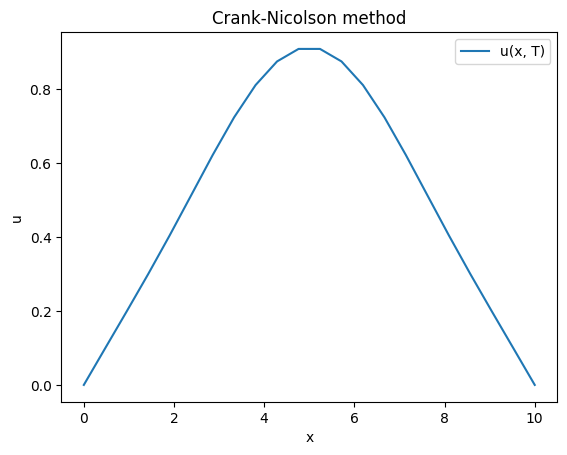

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Define parameters
L = 10          # Length of the domain
Nx = 20         # Number of spatial steps
dx = L / (Nx+1) # Spatial step size
alpha = 1       # Diffusion coefficient
dt = 0.01       # Time step size
T = 1           # Total time
Nt = int(T/dt)  # Number of time steps
r = alpha*dt/(2*dx**2)  # Stability parameter

# Define the grid
x = np.linspace(0, L, Nx+2)
u = np.zeros(Nx+2)
u_new = np.zeros(Nx+2)

# Initial condition (e.g., a Gaussian peak in the center)
u = np.exp(-((x - L/2)**2) / (0.1*L**2))

# Time-stepping loop
for n in range(0, Nt):
    # Update all interior points at time n+1
    for i in range(1, Nx+1):
        u_new[i] = u[i] + r*(u[i+1] - 2*u[i] + u[i-1])

    # Update the solution
    u = u_new.copy()

# Plot the final result
plt.plot(x, u, label='u(x, T)')
plt.title('Crank-Nicolson method')
plt.xlabel('x')
plt.ylabel('u')
plt.legend()
plt.show()


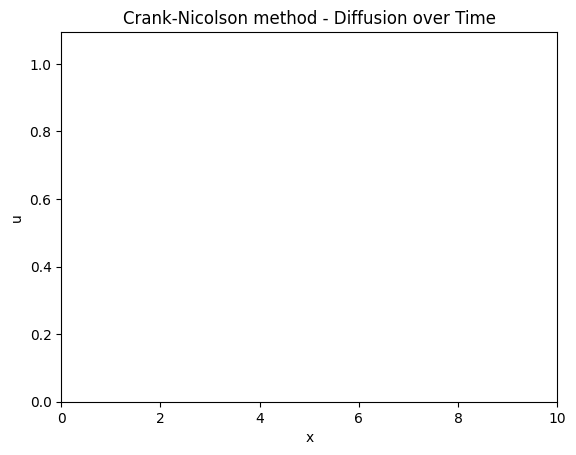

'diffusion.mp4'

In [7]:
from matplotlib.animation import FuncAnimation

# Redefine the initial condition
u = np.exp(-((x - L/2)**2) / (0.1*L**2))

# Create a figure and a line object
fig, ax = plt.subplots()
line, = ax.plot([], [], lw=2)

# Axis limits
ax.set_xlim((0, L))
ax.set_ylim((0, 1.1 * np.max(u)))

# Initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

# Animation function: this is called sequentially
def animate(n):
    global u
    u_new = u.copy()
    # Update all interior points at time n+1
    for i in range(1, Nx+1):
        u_new[i] = u[i] + r*(u[i+1] - 2*u[i] + u[i-1])

    u = u_new.copy()
    line.set_data(x, u)
    return line,

# Call the animator
anim = FuncAnimation(fig, animate, init_func=init, frames=Nt, interval=50, blit=True)

plt.title('Crank-Nicolson method - Diffusion over Time')
plt.xlabel('x')
plt.ylabel('u')
# To save the animation, uncomment the following line
# anim.save('/mnt/data/diffusion.mp4', fps=30, extra_args=['-vcodec', 'libx264'])

# Show the animation
plt.show()

# Since we can't directly show the animation in this notebook, let's provide the file path for download.
output_file_path = 'diffusion.mp4'
anim.save(output_file_path, fps=30, extra_args=['-vcodec', 'libx264'])
output_file_path


'diffusion_crank_nicolson.mp4'

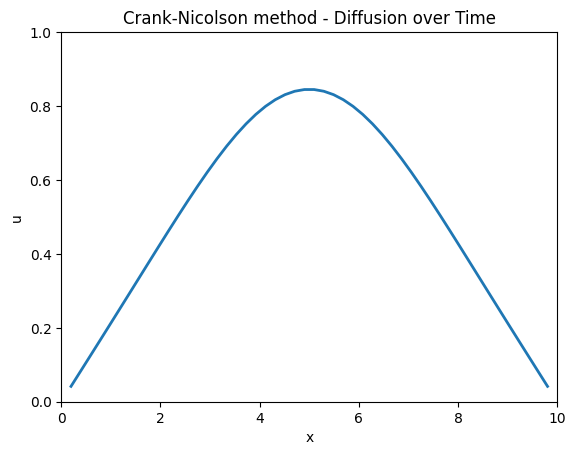

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from scipy.linalg import solve

# Parameters
L = 10          # Length of the domain
Nx = 50         # Number of spatial steps
dx = L / (Nx+1) # Spatial step size
alpha = 1       # Diffusion coefficient
dt = 0.01       # Time step size
T = 1           # Total time
Nt = int(T/dt)  # Number of time steps
r = alpha*dt/(2*dx**2)  # Stability parameter

# Create a figure and a line object
fig, ax = plt.subplots()
line, = ax.plot([], [], lw=2)

# Axis limits
ax.set_xlim((0, L))
ax.set_ylim((0, 1))

# Initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

# Construct the A and B matrices for the linear system
A = np.zeros((Nx, Nx))
B = np.zeros((Nx, Nx))
for i in range(Nx):
    for j in range(Nx):
        if i == j:
            A[i, j] = 1 + 2*r
            B[i, j] = 1 - 2*r
        elif abs(i - j) == 1:
            A[i, j] = -r
            B[i, j] = r

# Initial condition
x = np.linspace(0, L, Nx+2)
u = np.exp(-((x - L/2)**2) / (0.1*L**2))
u = u[1:-1]  # Exclude boundary points

# Animation function: this is called sequentially
def animate(n):
    global u
    # Solve the system A*u_new = B*u
    u_new = solve(A, B @ u)
    u = u_new.copy()
    # Update the line data for the animation
    line.set_data(x[1:-1], u)
    return line,

# Call the animator
anim = FuncAnimation(fig, animate, init_func=init, frames=Nt, interval=50, blit=True)

plt.title('Crank-Nicolson method - Diffusion over Time')
plt.xlabel('x')
plt.ylabel('u')

# To save the animation, uncomment the following line
output_file_path = 'diffusion_crank_nicolson.mp4'
anim.save(output_file_path, fps=30, extra_args=['-vcodec', 'libx264'])

# Return the path to the saved animation file
output_file_path


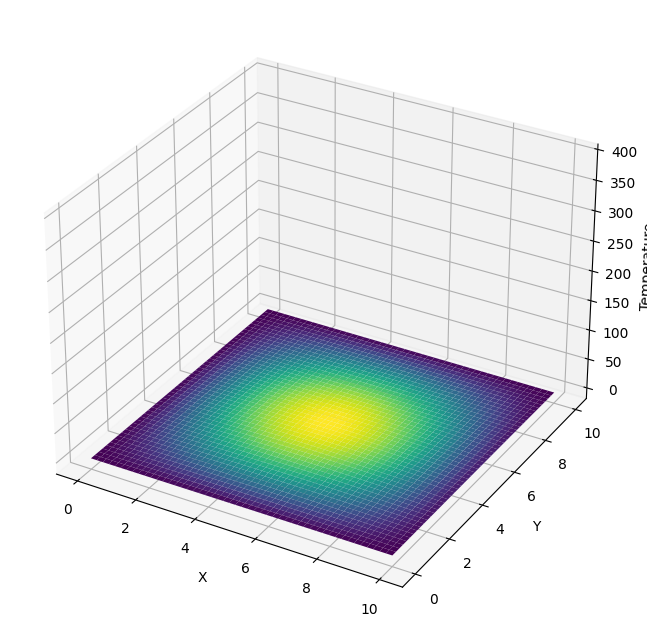

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from scipy.sparse import diags
from scipy.sparse.linalg import spsolve

# Set the parameters
Lx = Ly = 10  # domain size
nx = ny = 50  # number of grid points
dx = Lx / (nx - 1)  # space step in x direction
dy = Ly / (ny - 1)  # space step in y direction
a = 1  # diffusion coefficient
dt = 0.01  # time step
nt = 800  # number of time steps
T_avg = 200
# Ensure stability with the CFL condition
mu = a * dt / (2 * dx**2)
assert mu < 0.5, "CFL condition not met, reduce the time step or increase the grid spacing."

# Create meshgrid for x and y
x = np.linspace(0, Lx, nx)
y = np.linspace(0, Ly, ny)
X, Y = np.meshgrid(x, y)

# Initial conditions: Gaussian centered in the domain
u0 = np.exp(-((X - Lx / 2)**2 + (Y - Ly / 2)**2))*T_avg
u = u0.flatten()
# Define diagonals
# Correct the construction of the sparse matrix for the Crank-Nicolson scheme

# Define the number of points in the grid
N = nx * ny

# Define the diagonals
main_diag = -4 * np.ones(N)
side_diag = np.ones(N-1)
up_down_diag = np.ones(N-nx)

# Prepare offsets for the diagonals
diagonals = [main_diag, side_diag, side_diag, up_down_diag, up_down_diag]

# Adjust the diagonals for periodic boundary conditions
for i in range(nx):
    diagonals[1][i * nx - 1] = 0  # Right boundary
    diagonals[2][i * nx] = 0  # Left boundary
diagonals[3][:nx] = 0  # Upper boundary
diagonals[4][-nx:] = 0  # Lower boundary

# Create the sparse matrix using diags
offsets = [0, -1, 1, -nx, nx]
A = diags(diagonals, offsets, shape=(N, N), format='csr')

# Crank-Nicolson matrix
I = diags([np.ones(N)], [0], shape=(N, N), format='csr')  # Identity matrix
CN_matrix = I - mu * A
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# Now, we will correct the update function for the animation
def update(i):
    global u
    # Crank-Nicolson step
    u_new = spsolve(CN_matrix, u + mu * (A @ u))
    
    # Update the solution
    u = u_new
    
    # Clear the previous frame
    ax.cla()
    
    # Reshape the solution for 2D plotting
    U = u.reshape((ny, nx))
    
    # Plot the surface
    wframe = ax.plot_surface(X, Y, U, cmap='viridis')
    
    # Setting the axes properties
    ax.set_zlim(-10, 2*T_avg)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Temperature')

    return wframe,

# Create animation
ani = FuncAnimation(fig, update, frames=nt, blit=False)
ani.save('diffusion_2d.mp4', fps=20)
# Display the animation
# plt.show()


'vorticity_evolution.mp4'

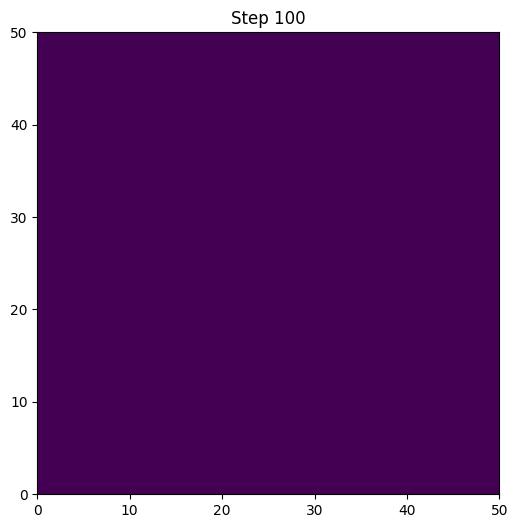

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Parameters
nx, ny = 50, 50  # Grid points
dx, dy = 1.0, 1.0  # Grid spacings
dt = 0.01  # Time step
nu = 0.1  # Viscosity
steps = 100  # Number of time steps for the animation
alpha = 0.5  # Relaxation parameter for fixed-point iteration

# Initial condition for vorticity (omega)
omega = np.zeros((nx, ny))

# Velocity field (u, v) - assuming some constant field for demonstration
u = np.ones((nx, ny))
v = np.zeros((nx, ny))

# Crank-Nicolson with fixed-point iteration for the implicit part
def fixed_point_iteration(omega, u, v, dt, dx, dy, nu, alpha):
    omega_new = np.copy(omega)
    omega_next = np.copy(omega)

    # Fixed-point iteration
    for _ in range(10):  # Limiting to 10 iterations for demonstration
        for i in range(1, nx-1):
            for j in range(1, ny-1):
                advect_n = 0.5 * (
                    u[i, j] * (omega[i+1, j] - omega[i-1, j]) / (2 * dx) +
                    v[i, j] * (omega[i, j+1] - omega[i, j-1]) / (2 * dy)
                )
                advect_np1 = 0.5 * (
                    u[i, j] * (omega_next[i+1, j] - omega_next[i-1, j]) / (2 * dx) +
                    v[i, j] * (omega_next[i, j+1] - omega_next[i, j-1]) / (2 * dy)
                )

                diff_n = nu * (
                    (omega[i+1, j] - 2*omega[i, j] + omega[i-1, j]) / dx**2 +
                    (omega[i, j+1] - 2*omega[i, j] + omega[i, j-1]) / dy**2
                )
                diff_np1 = nu * (
                    (omega_next[i+1, j] - 2*omega_next[i, j] + omega_next[i-1, j]) / dx**2 +
                    (omega_next[i, j+1] - 2*omega_next[i, j] + omega_next[i, j-1]) / dy**2
                )

                # Update formula using the fixed-point iteration method
                omega_new[i, j] = alpha * omega_next[i, j] + (1 - alpha) * (
                    omega[i, j] + dt / 2 * (advect_n + advect_np1 + diff_n + diff_np1)
                )

        omega_next = omega_new

    return omega_new

# Set up the figure and axis for the animation
fig, ax = plt.subplots(figsize=(6, 6))
cax = ax.imshow(omega, extent=[0, nx*dx, 0, ny*dy], origin='lower')

def animate(step):
    global omega
    omega = fixed_point_iteration(omega, u, v, dt, dx, dy, nu, alpha)
    cax.set_data(omega)
    ax.set_title(f"Step {step+1}")
    return cax,

# Create animation
anim = FuncAnimation(fig, animate, frames=steps, interval=50, blit=True)

# Save the animation as a gif file
gif_path = "vorticity_evolution.mp4"
anim.save(gif_path, fps=20)

# Return the path of the saved gif
gif_path
